## L'agent Logan

Lancé à la poursuite d'un criminel, l'agent Logan du FBI doit traverser une rivière d'une largeur de 1600 m qui coule à 0.80 m$\cdot$s$^{-1}$ en un minimum de temps et se rendre directement en face de son point de départ. Sachant qu'il peut ramer à 1.50 m$\cdot$s$^{-1}$ et courir à 3.00 m$\cdot$s$^{-1}$, décrivez la route qu'il devrait suivre (en bateau et à pied le long de la rive) pour traverser ce cours d'eau le plus rapidement possible.
Déterminez le temps minimal requis pour cette traversée.


In [1]:
from IPython.display import Image


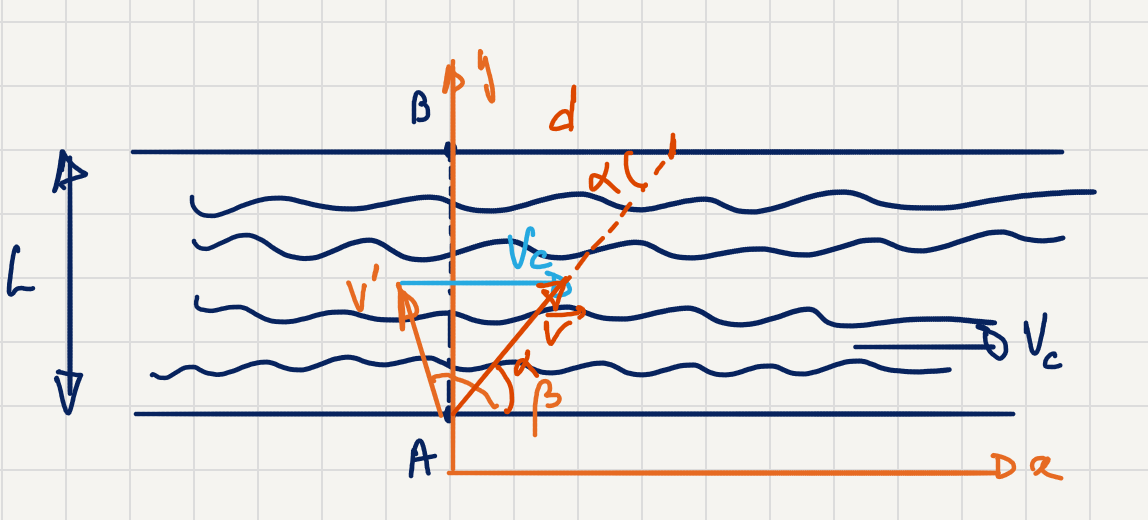

In [2]:
Image("Logan.png")

## have a slider to vary beta, update drawing; Calculate the time spent rowing and running the 
## In a secont step also vary the 3 speeds


vitesse du courant: $\vec v_c$

vitesse par rapport au courant: $\vec v'$ avec $|\vec v'|=v'$ connu ($v_{rame}$)

vitesse par rapport à la rive: $\vec v=\vec v'+\vec v_c$

Composantes des vitesses:

\begin{align*}
\vec v_c&=\begin{pmatrix}v_c\\0 \end{pmatrix} & \vec v&=\begin{pmatrix}v_x=v\cos\alpha\\v_y=v\sin\alpha \end{pmatrix} & \vec v'&=\begin{pmatrix}v'\cos\beta\\v'\sin\beta \end{pmatrix}
\end{align*}
Il vient:

$$\vec v=\begin{pmatrix}v_c+v'\cos\beta\\v'\sin\beta \end{pmatrix}=\begin{pmatrix}v\cos\alpha\\v\sin\alpha \end{pmatrix}$$

Ainsi: $$\tan\alpha=\frac{v\sin\alpha}{v\cos\alpha}=\frac{v'\sin\beta}{v_c+v'\cos\beta}=\frac ld$$

Donc:
$$\boxed{d=l\frac{v_c+v'\cos\beta}{v'\sin\beta}}$$

Le temps de course sur la rive est donc donné par 

$$t_c=l\frac{v_c+v'\cos\beta}{v'\sin\beta}\frac{1}{v_{course}}$$

Le temps de traversée est donné par: $t_t=\frac l{v'\sin\beta}$

Le temps total est donc:

$$\boxed{t_{tot}=\frac l{v'\sin\beta}+l\frac{v_c+v'\cos\beta}{v'\sin\beta}\frac1{v_{course}}=l\left[\frac{v_{course}+v_c+v'\cos\beta}{v_{course}\cdot v'\sin\beta}\right]}$$

On cherche à minimiser en fonction de $\beta$:

$$\frac{\text dt_{tot}}{\text d\beta}=l\cdot\frac{-v_{course}v'\sin\beta\cdot v'\sin\beta-v_{course}v'\cos\beta\left[v_{course}+v_c+v'\cos\beta\right]}{\left[v_{course}\cdot v'\sin\beta\right]^2}=f(\beta)$$

et on cherche $f(\beta)=0$.

\begin{align*}
-v'^2v_{course}\sin^2\beta-v'v_{course}^2\cos\beta
-v_cv'v_{course}\cos\beta-v_{course}v'^2\cos^2\beta&=0\\
\end{align*}

$$\boxed{\cos\beta=\frac{-v'}{v_c+v_{course}}}$$
A.N.: $\beta=1.98$ (équivalent à 113.2°,  soit 23.2° vers l'amont). Le temps de course sera alors de 80.5 s et la traversée de 1160 s, soit un temps total de 1241.5 s (20.7 min).